# Quantum Phenomena

Quantum effects can be very counterintuitive, in some sense our intuition is not built for a quantum world because the macroscopic world looks very classical. An excellent example of quantum magic is quantum tunneling:

Imagine a particle travelling along a potential energy surface $V(x)$ (time independent) with some kinetic energy ($T$). The total energy ($E$) is simply:

$$ E = T + V $$

If there is a potential energy barrier which is higher than the total energy $E$ of our particle, then classically the particle will never get past the barrier.

However, in the quantum regime, we have to consider the wave-like nature of our particle. As you may remember, when a wave encounters a barrier, some of it will be reflected and some of it will be transmitted. This suggests that as long as the energy barrier is finitely high, the particle may in fact slip through.

This combined with de Broglie's realization that all matter is a wave, brings us to a startling realization. Say we have a glass of water (ignoring effects like evaporation), if we wait long enough, the water molecules will tunnel through the glass (not jump over it). Don't try this at home though, chances are you'll see the heat death of the universe long before any molecules get through.

In [3]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

We can actually observe some tunneling by numerically solving Schrödinger's equation, just like in the `schroedinger_equation.ipynb` notebook, simply by choosing the potential energy function $V(x)$ carefully.

In [4]:
N = 300
L = 100
w = 30

def V(x):
    n = len(x)
    V = np.ones(n)*0
    V[np.abs(x)<=w/2] = 0.05
    return V

eta = 1
m = 1
q = 1

In [5]:
X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

<IPython.core.display.Javascript object>


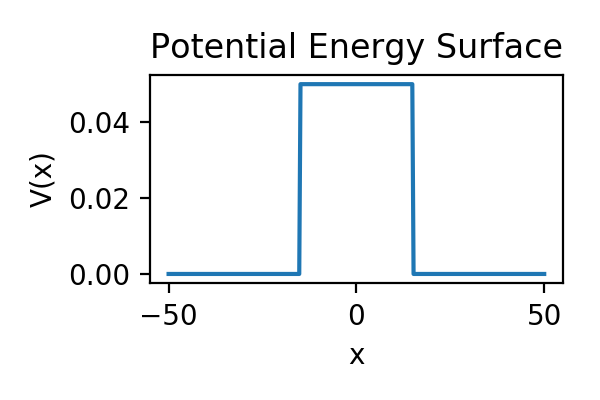

In [6]:
plt.figure(figsize=(3,2))
plt.plot(X, V(X))
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Potential Energy Surface')
plt.tight_layout()

Once again we the hamiltonian for our discretized system, and solve for the eigenvalues and eigenvectors

In [7]:
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian

In [8]:
vals, vecs = np.linalg.eig(H)
vals.shape, vecs.shape

((300,), (300, 300))

In [9]:
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
vecs /= np.sqrt(a)

<IPython.core.display.Javascript object>


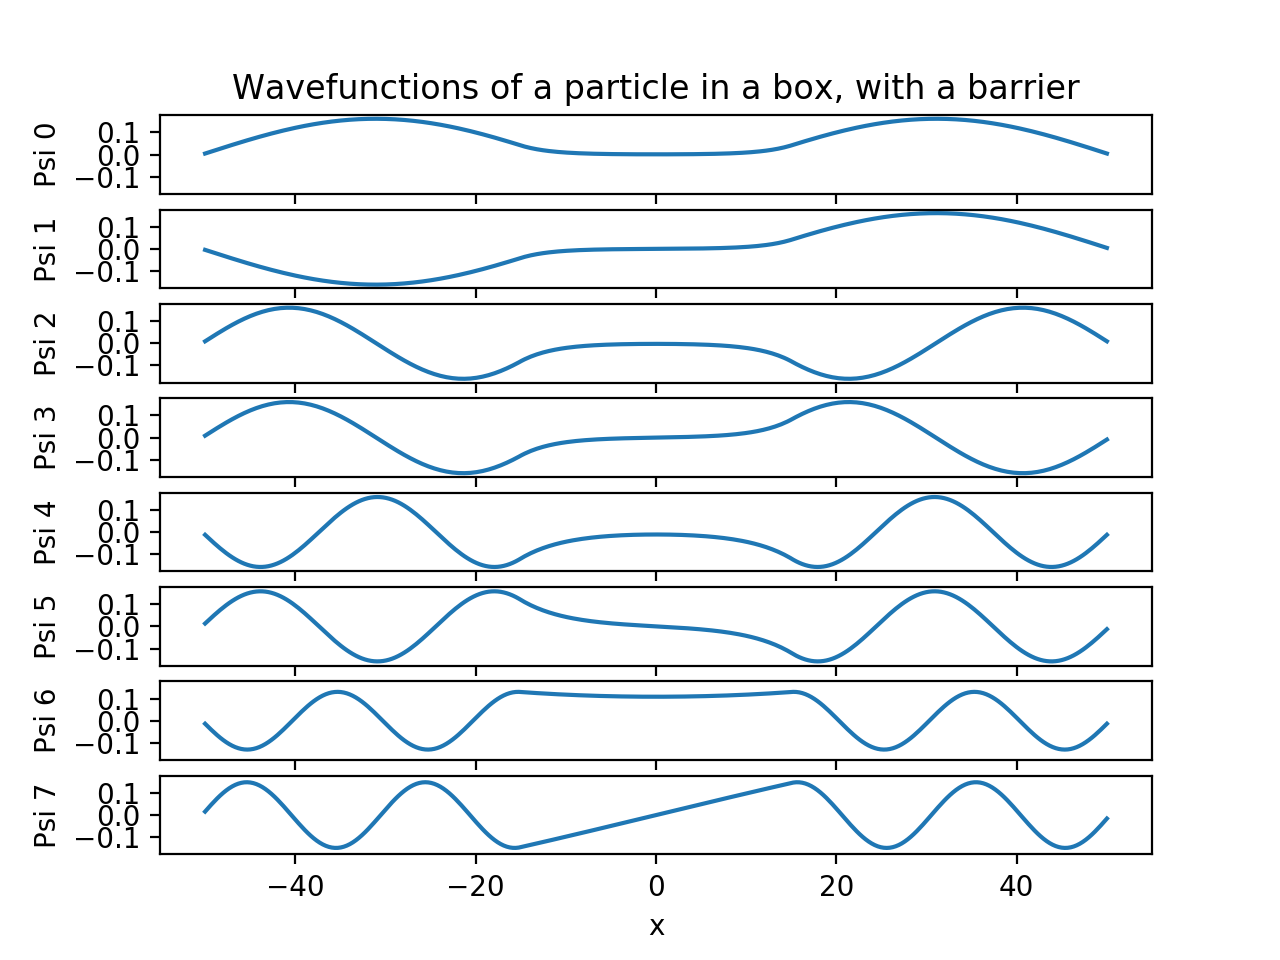

E_0 = 0.0033
E_1 = 0.0033
E_2 = 0.0132
E_3 = 0.0132
E_4 = 0.0293
E_5 = 0.0294
E_6 = 0.0492
E_7 = 0.0503


Text(0.5, 0, 'x')

In [10]:
fig, axes = plt.subplots(8, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Wavefunctions of a particle in a box, with a barrier')
for i, (ax, psi, E) in enumerate(zip(axes, vecs, vals)):
    plt.sca(ax)
    plt.ylabel('Psi {}'.format(i))
    plt.plot(X, psi)
    #plt.fill_between(X, psi, alpha=0.3)
    print('E_{} = {:.4f}'.format(i, E))
plt.xlabel('x')

Note the computed energies for the first 8 levels and compare them to the height of our potential energy barrier. Remember that the eigenvalues of our hamiltonian are the total energies $E$ of each state.

Just as before, we'll use our wavefunctions to predict the outcomes of measurements of the positions of our particle.

In [11]:
p = np.abs(vecs)**2

<IPython.core.display.Javascript object>


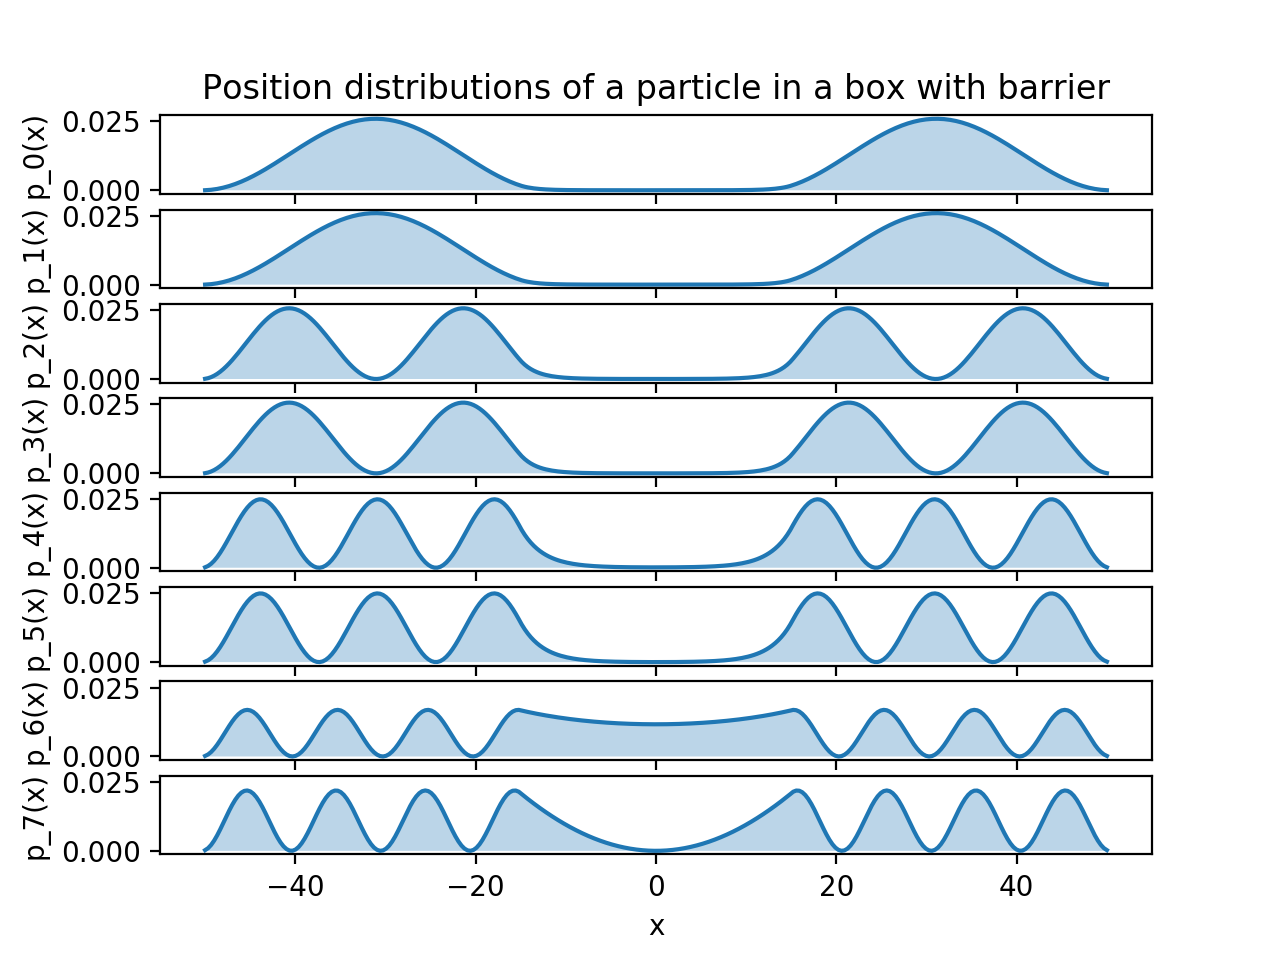

Text(0.5, 0, 'x')

In [12]:
fig, axes = plt.subplots(8, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Position distributions of a particle in a box with barrier')
for i, (ax, pᵢ) in enumerate(zip(axes, p)):
    plt.sca(ax)
    plt.ylabel('p_{}(x)'.format(i))
    plt.plot(X, pᵢ)
    plt.fill_between(X, pᵢ, alpha=0.3)
plt.xlabel('x')

Looking at the plot above, what do you notice about the distributions of the even and odd solutions we found?

For a particle in a box (considered in `schroedinger equation.ipynb`) we saw that our solutions for the wavefunction alternated between being even and odd (remember what it means for a function to be even/odd?). Now our potential is very similar, except that there is a barrier in the middle, resulting in a well on either side of the barrier. If we look at our wavefunctions for only a single well, they resemble the solutions to the particle in the box.

If we think of our system as being two particles in a box next to each other, then what differentiates the ground state from the first excited state in our system? Looking at the plotted wavefunctions, we see in the ground state our two "imaginary" particles are in phase, while in the first excited state the particles are out of phase. In fact, this is related to electrons of different atoms interacting to form bonding and antibonding orbitals in molecules (for further reading). For now, just note the similarities between this system and the particle in the box, and understand the resulting trends in the energy spectrum.

Now let's find the probability of measuring our particle in the barrier for each energy level using our probability density functions.
To find the probability of some event $B$, we integrate our probability density function over all states in $B$. Since we discretized our probability density function, the integral turns into a sum using our grid spacing $a$.

$$ \mathrm{Prob}(B) = \int_{x \in B} p(x) dx = a \sum_{x \in B} p(x)$$

<IPython.core.display.Javascript object>


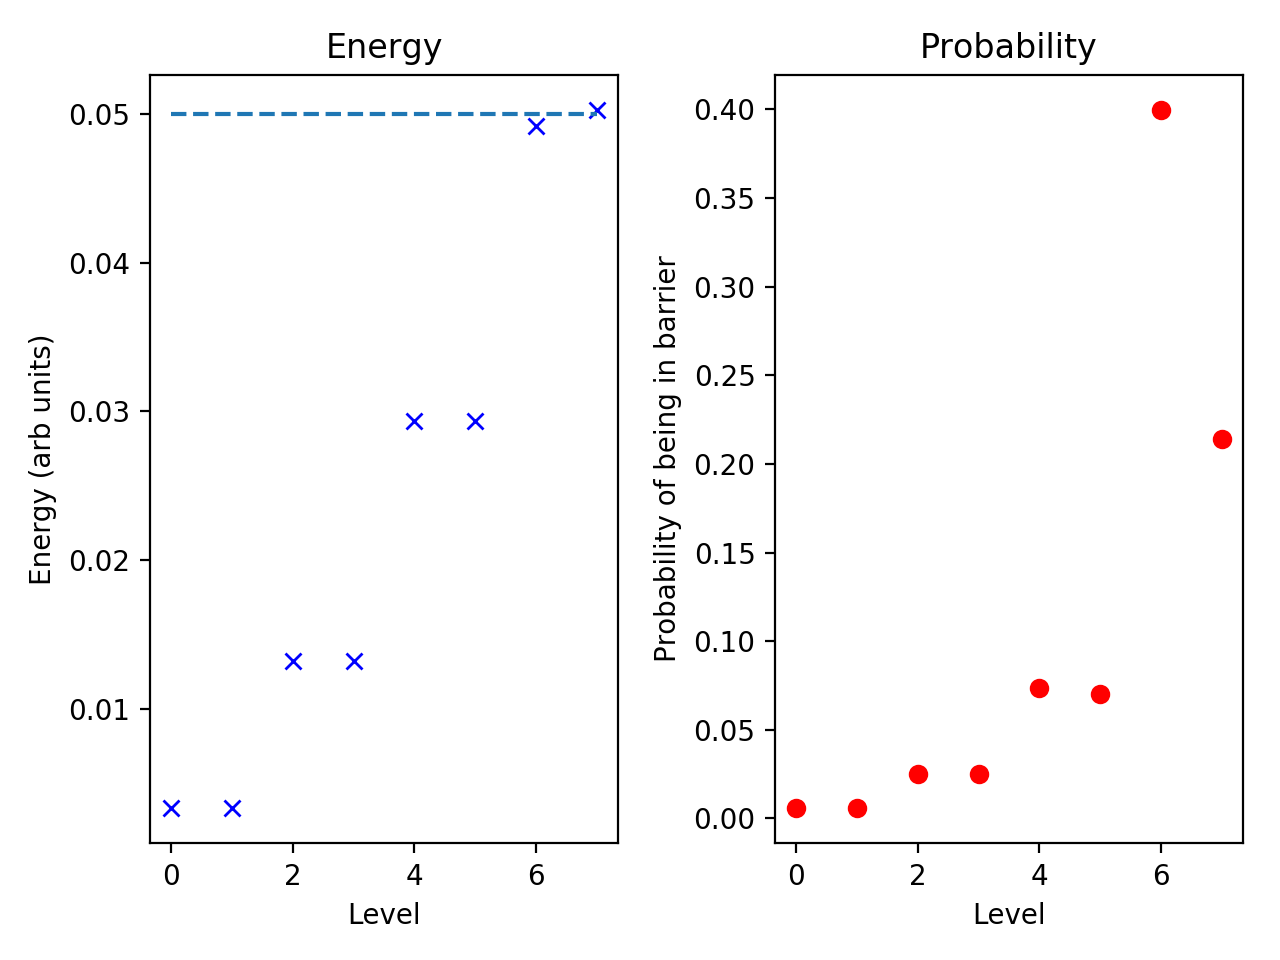

Level | Energy | Prob(B)
------+--------+--------
     0|  0.0033|  0.0057
     1|  0.0033|  0.0056
     2|  0.0132|  0.0251
     3|  0.0132|  0.0249
     4|  0.0293|  0.0734
     5|  0.0294|  0.0700
     6|  0.0492|  0.3999
     7|  0.0503|  0.2141


In [13]:
B = V(X) != 0

barrier = a * p[:, B].sum(-1)

num = 8

fig, (ax1, ax2) = plt.subplots(1,2)

plt.sca(ax1)
plt.title('Energy')
plt.plot(np.arange(num), vals[:num], color='b', ls='', marker='x')
plt.plot(np.arange(num), np.ones(num)*V(X)[B].mean(), ls='--')
plt.xlabel('Level')
plt.ylabel('Energy (arb units)')
#ax1.tick_params('y', colors='b')

#ax2 = ax1.twinx()
plt.sca(ax2)
plt.title('Probability')
plt.plot(np.arange(num), barrier[:num], color='r', ls='', marker='o')
plt.xlabel('Level')
plt.ylabel('Probability of being in barrier')

fig.tight_layout()

print('Level | Energy | Prob(B)')
print('------+--------+--------')
for i, (E, prob_barrier) in enumerate(zip(vals[:8], barrier)):
    print('{:6}|  {:.4f}|  {:.4f}'.format(i, E, prob_barrier))

Let's reflect on the results a little bit. Specifically, look at the fourth excited state (level 4), note that the total energy of this state is significantly lower (about $0.3$) than our barrier ($0.5$), yet the probability of finding the particle in the barrier is over 5%, which means we only have to repeat this experiment around 20 times before we expect to find the particle in the barrier. 

If we know the particle is in the fourth excited state, and we find it inside the barrier, then we know the total energy $E \approx 0.3$ and the potential energy $V = 0.5$. This would suggest the kinetic energy is negative. Recall the definition of the kinetic energy $T = \frac{p^2}{2m}$, the mass is certainly not negative, and we can't make sense of an imaginary momentum - so how can we make sense of this?

We can conclude that in a quantum world, we simply can't know the kinetic energy when we've measured the position. In other words, these two measurements don't commute. This is a very conceptual derivation of the uncertainty principle, which is usually first introduced between position and momentum, but as kinetic energy is related to momentum, the same principle holds for position and kinetic energy. 

More formally, given two operators $\mathrm{A}$ and $\mathrm{B}$, their commutation relation is given by operator $ \left[\mathrm{A}, \mathrm{B} \right] $:

$$ \left[\mathrm{A}, \mathrm{B} \right] = \mathrm{A}\mathrm{B} - \mathrm{B}\mathrm{A} $$

$\mathrm{A}$ and $\mathrm{B}$ are said to commute if and only if their commutation relation is zero, $\left[\mathrm{A}, \mathrm{B} \right] = 0$.

This is slightly sloppy notation, as operators without functions to act on do no make well formed expressions, so strictly speaking, we should say $\mathrm{A}$ and $\mathrm{B}$ commute if and only if $\left[\mathrm{A}, \mathrm{B} \right]=0$ for any $\phi$

$$ (\mathrm{A}\mathrm{B} - \mathrm{B}\mathrm{A}) \phi = \left[\mathrm{A}, \mathrm{B} \right] \phi = 0$$

### Problem 1: Position vs. Kinetic Energy Commutation

Show that the position operator and the kinetic energy operator do not commute and derive their commutation relation, given their definitions below.

$$ \hat{x} = x$$
$$ \hat{T} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} = \frac{\hat{p}^2}{2m} $$

$$ [\hat{x}, \hat{T}] =~?$$

Hint: a possibly useful property of commutation relations: $ \left[\mathrm{A}, \mathrm{B}^2 \right] = \left[\mathrm{A}, \mathrm{B} \right] \mathrm{B} + \mathrm{B} \left[\mathrm{A}, \mathrm{B} \right]$

# __Solution:__

$$ [\hat{x}, \hat{T}] = [\hat{x}, \frac{\hat{p}^2}{2m}] = [\hat{x}, \hat{p}]\frac{\hat{p}}{2m} + \frac{\hat{p}}{2m}[\hat{x}, \hat{p}] $$

Substituting $ \hat{p} = \frac{\hbar}{i}\frac{\partial}{\partial x} $ and the canonical commutation relation $ [\hat{x}, \hat{p}] = i\hbar $,

$$ [\hat{x}, \hat{T}] = \frac{i\hbar}{m}\frac{\partial}{\partial x} =  -\frac{\hat{p}}{m}$$

From the above equation we can infer that position and kinetic energy do not commute whenever momentum is non-zero.

### Superposition

Classically the state of a system can be defined in terms of observables, such as position and momentum. Incidentally, for any physical system, if you specify the positions and momenta of all degrees of freedom then you have fully specified the state. 

However, in quantum mechanics we treat the state of our system (the wavefunction) separately from the observables (which correspond to operators). With this formalism, the outcome of a measurement (applying an operator to the wavefunction) corresponds to an eigenvalue of the operator corresponding to that observable. Since the measurements we make must be real, it follows that all eigenvalues of operators for observables are real, so the operators must be hermitian.

So far so good, if our state is in an eigenstate of some observable, then when we make the corresponding measurement, we'll get the corresponding eigenvalue as the outcome. However, the Hamiltonian is a linear operator, so any linear combination of solultions to the Schrödinger equation is also a valid solution. So how do we interpret linear combinations, aka a superposition, of eigenstates?

Given some operator $\mathbf{\hat{O}}$ with eigenvalues $\lambda_i$ and corresponding eigenstates $|\phi_i \rangle$. If $\mathbf{\hat{O}}$ is to correspond to an observable in the real world, it better be hermitian and unitary, which means the eigenstates $|\phi_i \rangle$ form an orthonormal bases:

$$ \langle \phi_i | \phi_j \rangle = \delta_{ij} $$

where $ \delta_{ij} $ is the Kronecker delta.

Say we are in the state $|\psi \rangle = \sum_i c_i | \phi_i \rangle$ for some coefficients $c_i$. First, a bit of linear algebra knowledge tells us we can write any state imaginable as a linear combination of eigenstates because the eigenstates form an orthonormal basis.

Next, we can recognize that, since we want our state $|\psi \rangle$ to be normalized (wavefunctions are always normalized!), and since each of the eigenstates $|\psi \rangle$ are normalized that places a constraint on the coeffients $c_i$:

$$ \langle \psi | \psi \rangle = 1 $$

$$ \langle \psi | \psi \rangle = \left( \sum_i c_i^* \langle \phi_i | \right)\left( \sum_j c_j | \phi_j \rangle \right) $$

By orthonormality the cross terms cancel out,

$$ \langle \psi | \psi \rangle = \sum_i c_i^* c_i \langle \phi_i | \phi_i \rangle $$

So, for our general state $|\psi \rangle$ to be normalized $c_i$ may be anything (including being complex) as long as the coeffients obey:

$$ 1 = \sum_i |c_i|^2 $$

When we dealt with stationary states (eigenstates of the hamiltonian), the time evolution of our system simply changed the overall phase of our state, but the time evolution of a superposition is more complicated.

For each energy eigenstate $\phi_j$ with corresponding eigenvalue $E_j$, we know the time evolution is given by $e^{-i\frac{E_j}{\hbar}t}$. When dealing with a linear combination of eigenstates, we can simply include the corresponding temporal component to each term in the linear combination to produce a valid solution of the time dependent Schrödinger equation.

$$ | \psi \rangle = \sum_j c_j | \phi_j \rangle \rightarrow |\Psi(x,t)\rangle = \sum_j c_j e^{-i\frac{E_j}{\hbar}t} | \phi_j \rangle $$

where $|\phi_j \rangle$ and $E_j$ are the eigenstate/eigenvalue pairs of the hamiltonian.

Now we can observe the time evolution of superposition states, once again using `matplotlib` animations.

In [14]:
import matplotlib.animation as animation
np.set_printoptions(precision=4, linewidth=110) # just to make printing arrays slightly nicer

Solve our favorite equation with the potential of our choice: for example, a harmonic.

In [173]:
N = 300
L = 100

def V(x): # Return the potential energy given the position of each grid element
    return 0.001 * x**2
    #return 0 * x # In this case, we are setting the potential energy to zero.

eta = 1
m = 1
q = 1

X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

# Define discretized hamiltonian
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1)

# Solve TISE to get wavefunctions and energies
vals, vecs = np.linalg.eig(H)
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
# Normalize wavefunction
vecs /= np.sqrt(a)

<IPython.core.display.Javascript object>


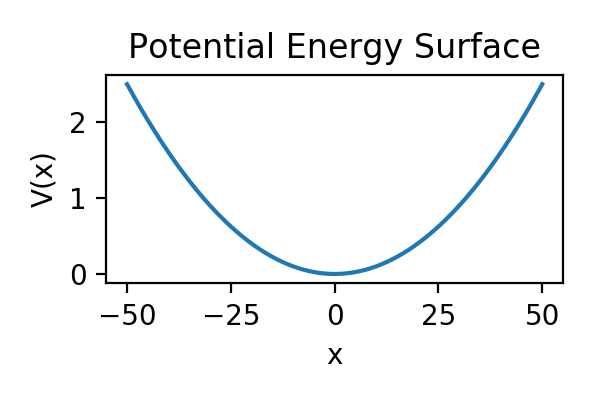

In [174]:
plt.figure(figsize=(3,2))
plt.plot(X, V(X))
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Potential Energy Surface')
plt.tight_layout()

Before we look at arbitrary superpositions we have to reflect on how we solved the Schrödinger equation in the first place. As we discretizing space, we can't trust the computed high energy eigenstates/eigenvalues. Consequently, we should choose some cutoff (say 20), and only consider superpositions of states below that cutoff.

After that you can specify what ever (unnormalized) superposition of levels you want in the cell below.

In [199]:
cutoff = 20 # how many energy levels to trust from our computed results (probably shouldn't be more than 20 or so)
psi = vecs[:cutoff].astype(np.complex64)
E = vals[:cutoff]
coeff = np.zeros(cutoff, dtype=np.complex64)

# Here you can set the coefficients of the state to anything you want (don't worry about normalization yet)

#coeff[4] = 1
#coeff[0] = 1j
#coeff[3] = -2.5

coeff[0] = 10
coeff[1] = 3

Never forget to normalize the wavefunction - as seen below.

In [200]:
try:
    norm = (np.abs(coeff)**2).sum()
    assert norm > 0
    coeff /= np.sqrt(norm)
except AssertionError:
    print('Error: Norm is zero, you must set the coeffients to nonzero')
    
print('Coeffients:', coeff)

Coeffients: [0.9578+0.j 0.2873+0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j
 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j 0.    +0.j
 0.    +0.j 0.    +0.j]


As in the previous notebook, we define an `evolve` function for the matplotlib animation to compute the wavefunction at each timestep.

In [201]:
def evolve(coeff, psi, E, timestep=5, num_step=300):
    assert len(coeff) == len(psi) == len(E)
    ts = np.arange(num_step)*timestep
    t = 0
    cnt = 0
    while num_step is None or cnt < num_step:
        c = coeff * np.exp(- 1j * E / eta * t)
        cnt += 1
        t += timestep
        yield t, c @ psi

Real component in red, imaginary in blue


<IPython.core.display.Javascript object>


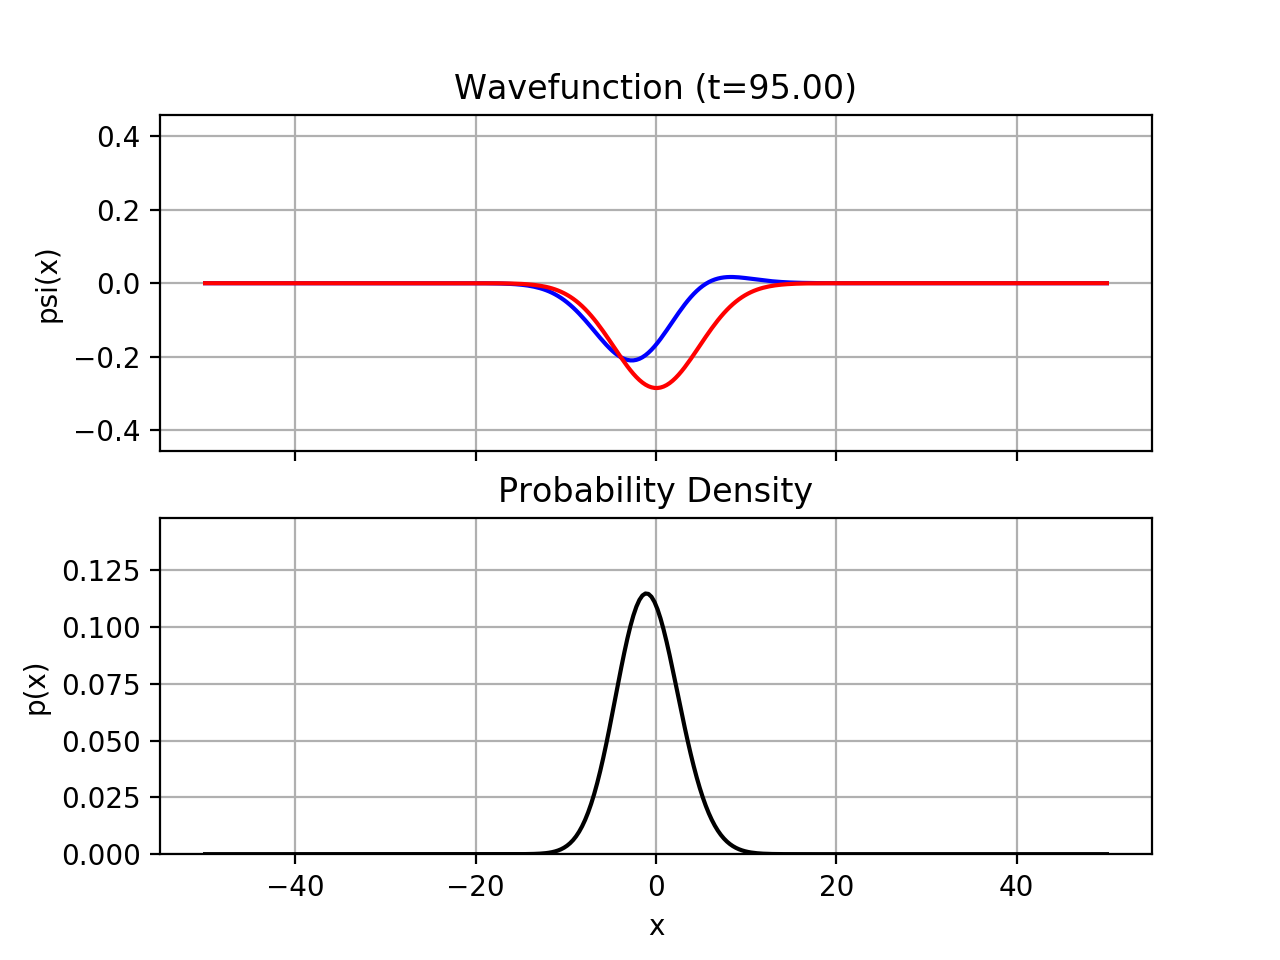

In [202]:
timestep = 1
num_step = 300

if timestep is None:
    av_E = (coeff)**2 @ E
    timestep = 2*np.pi * eta / av_E / num_step
    print('Using timestep: {:.4f}'.format(timestep))
    
evolution = evolve(coeff, psi, E, timestep=timestep, num_step=num_step)

print('Real component in red, imaginary in blue')

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title('Wavefunction')
ax1.set_ylabel('psi(x)')
ax2.set_title('Probability Density')
ax2.set_ylabel('p(x)')
ax2.set_xlabel('x')
wave = (coeff @ psi)
wave_real, = ax1.plot(X, wave.real, c='b')
wave_imag, = ax1.plot(X, wave.imag, c='r')
p = np.abs(wave)**2
dens, = ax2.plot(X, p, color='k')
#ax2.fill_between(X, p, color='k', alpha=0.2)
ax1.grid()
ax2.grid()
lim = np.sqrt(p).max()+0.1
ax1.set_ylim(-lim, lim)
ax2.set_ylim(-1e-4, max(p)+0.02)

def run(data):
    # update the data
    t, wave = data
    
    ax1.set_title('Wavefunction (t={:.2f})'.format(t))
    
    wave_real.set_data(X, wave.real)
    wave_imag.set_data(X, wave.imag)

    p = np.abs(wave)**2
    dens.set_data(X, p)
    
    #fig.canvas.draw()
    
    return wave_real, wave_imag, dens

ani = animation.FuncAnimation(fig, run, evolution, blit=False, interval=10, repeat=False)

plt.show()

### Problem 2: Oscillating Superpositions

Test a few different superpositions and observe how the wavefunction and, more importantly, the probability distribution over positions changes with time, then answer the questions below: (A short explanation/example for each question is fine)

1. How does the behavior compare between:
    1. Superpositions of only even states vs superpositions of only odd solutions?
    2. Superpositions of only high energy (below the cutoff though) states vs only low energy eigenstates?
    3. Superpositions with a single dominant term (one of the coefficients is significantly larger than all the others) vs fairly balanced superpositions?
    4. Superpositions where each term has the same phase vs where terms has a significantly different phase.

2. Give an example of a superposition that causes a large amount of probability density to oscillate back and forth uniformly (as one mass). In other words, what superposition produces a "pseudo-classical" oscillation in our harmonic well with as large of an amplitude you can achieve. (You don't have to find the optimal superposition, just one that looks good)

__Answers:__

1. 
    A. Probabaility value at the center is almost always 0 for odd superpositions wheras the same is always a peak for even superpositions.
    
    B. Superpositions of only higher energy states are of high frequency both spatially and temporally. Whereas the same are of significantly low frequency for lower energy states.
    
    C. Single dominant coefficient made the probability profile pretty stable and frequency close to that of dominant energy state. Probability profile with uniform coefficients is highly varying with time with no dominant frequency.
    
    D. The peaks of the probabilities and significantly higher when superpositions are in phase. Peaks were ~0.3 with same phase, whereas they were ~0.1 with significant phase difference. This might be due to a similar to resonance phenomemnon in classical waves. Superpositions with same phase would result in constructive interference while different phases could cause destructive interference.


2. Energy level zero corresponds to a state where there's large amount of potential at one place. So having a large state 0 coefficient is good idea. And, I observed that difference in energy levels create oscillation. So, I added a small coeffcient to 1-state. `coeff[0] = 10` and `coeff[1] = 3` produced a probability profile that is large at one point and oscillated resonably uniformly.
    

## Measurement

Since we can write any general state in terms of the eigenstates of a particular operator. Thinking about measurement becomes a little tricky with superpositions. The Copenhagen interpretation of quantum mechanics (which is most popular interpretation) posits that we can't directly measure a superposition of eigenstates. Instead, when we make a measurment of a particle in a superposition of eigenstates, the wavefunction "collapses" irreversibly to one of the eigenstates of our operator, and then the outcome we actually observe is the corresponding eigenvalue. Furthermore, the probability that our state $|\psi \rangle$ collapses to state $|\phi_i \rangle$ is given by $|c_i|^2$.

So, in short the probability of measuring eigenvalue $\lambda_i$ is given by:

$$ \mathrm{Prob}(\lambda_i) = | \langle \phi_i | \psi \rangle |^2 $$

This interpretation has massive physical and philosophical implications, which have freaked many of the greatest minds in the past and present. For example, Einstein who received the Nobel prize for his work in quantum mechanics vehemently opposed that any aspect of the universe could be nondeterministic. Nevertheless, the Copenhagen interpretation would suggest the outcome of an experiment can in fact be nondeterministic. Crazy, huh?

Consequently, in quantum mechanics, we have to be a little more careful about what we mean by the position, momentum, or any other observable of our particle. Since measuring an arbitrary state $|\psi \rangle$ could result in one of infinitely many outcomes, one common way to think about measurment outcomes is expectation values. For state $|\psi \rangle$ the expectation value of some operator $\mathbf{\hat{O}}$ is given by:

$$ \langle \mathbf{\hat{O}} \rangle = \langle \psi | \mathbf{\hat{O}} | \psi \rangle = \sum_i |c_i|^2 \lambda_i $$

### Problem 3: Expectation Values

Given a particle in state $|\chi \rangle$, trapped in a harmonic potential ($V(x) = 0.001 x^2$) with parameters ($\eta = 1$, $m = 1$, $q = 1$, $N = 300$, and $L = 100$, so $a \approx \frac{1}{3}$):

$$ | \chi \rangle = 2 | \phi_1 \rangle + 6i | \phi_2 \rangle - 3| \phi_5 \rangle $$

where $\phi_i$ is the $i$th eigenstate of the hamiltonian ($\phi_0$ is the ground state).

First normalize $| \chi \rangle$, then compute the expectation value of the hamiltonian $\langle \mathbf{\hat{H}} \rangle$. Compare the result you get in theory and empirically by numerically solving the Schrödinger equation.

__Solution (analytical):__

Normalized $ |\chi \rangle $ is

$$ |\chi \rangle = \frac{2{| \phi _1 \rangle} + 6i{| \phi _2 \rangle} - 3{| \phi _5 \rangle}}{\sqrt{4 + 36 + 9}} $$

$$ |\chi \rangle = \frac{1}{7}[2{| \phi _1 \rangle} + 6i{| \phi _2 \rangle} - 3{| \phi _5 \rangle}] $$

As a result, the expectation value of the Hamiltonian is,

$$ \langle \hat{H} \rangle = \frac{4}{49}E _1 + \frac{36}{49}E _2 + \frac{9}{49}E _5 $$

Energy levels of a particle in harmonic potential is given by

$$ E _n = (n + \frac{1}{2})\hbar\omega $$

Using $\hbar\omega = \hbar\sqrt{\frac{k}{m}} = 1 \times \sqrt{\frac{0.002}{1}} = 0.045$,

$$ E _1 = (1 + \frac{1}{2})\hbar\omega = 1.5 \times 0.045 = 0.0670$$

$$ E _2 = (2 + \frac{1}{2})\hbar\omega = 2.5 \times 0.045 = 0.112 $$

$$ E _5 = (5 + \frac{1}{2})\hbar\omega = 5.5 \times 0.045 = 0.246 $$

$$ \langle \hat{H} \rangle = \frac{4}{49} \times 0.067 + \frac{36}{49}\times0.112 + \frac{9}{49} \times 0.246 $$

$$ \langle \hat{H} \rangle = 0.133 $$

<IPython.core.display.Javascript object>


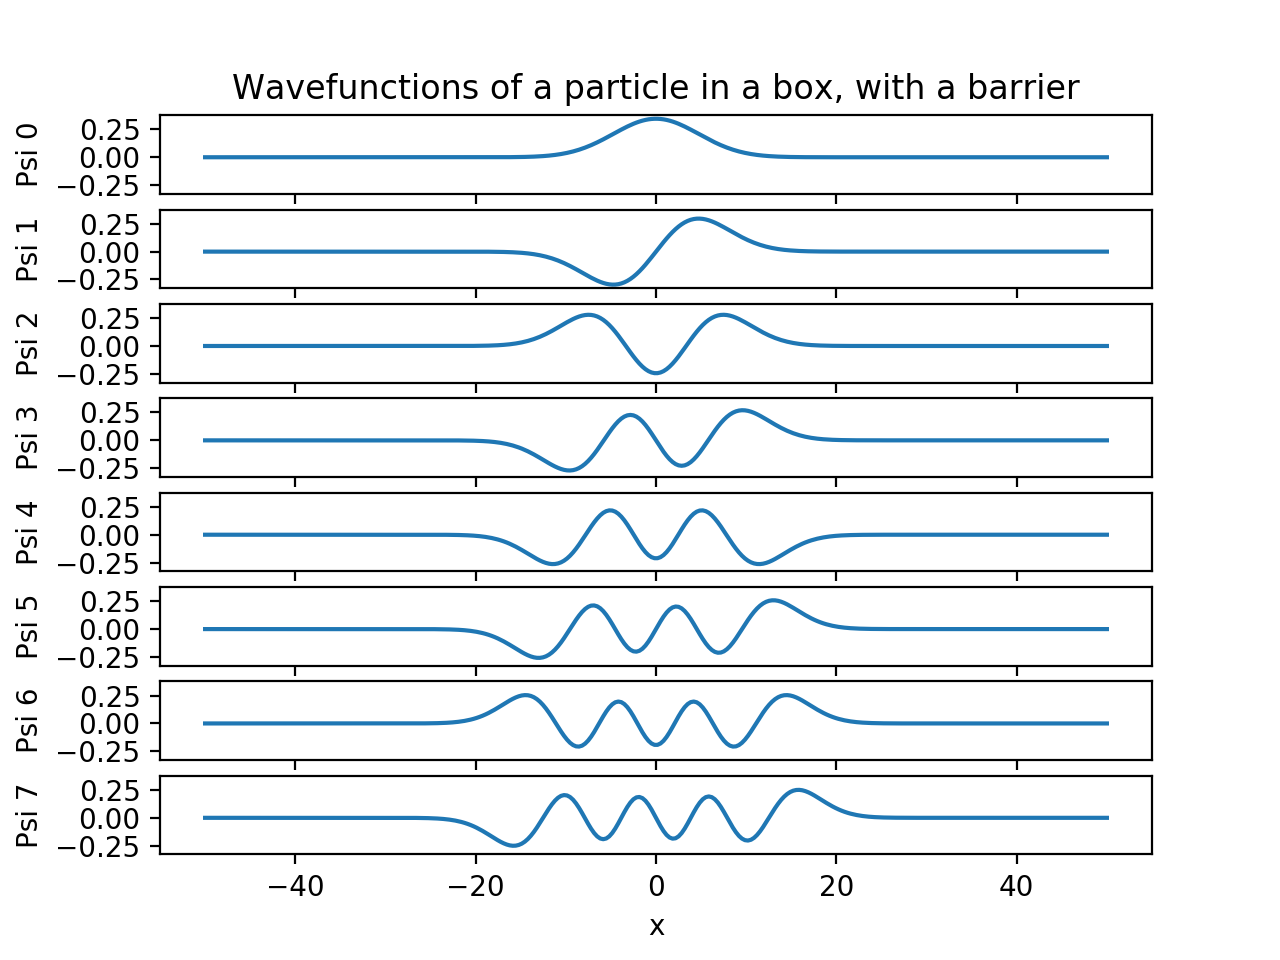

E_0 = 0.0224
E_1 = 0.0670
E_2 = 0.1117
E_3 = 0.1563
E_4 = 0.2010
E_5 = 0.2455
E_6 = 0.2901
E_7 = 0.3346
Expectation value of Hamiltonian = 0.1326


In [210]:
# Solution numerical

N = 300
L = 100

def V(x): # Return the potential energy given the position of each grid element
    return 0.001 * x**2
    #return 0 * x # In this case, we are setting the potential energy to zero.

eta = 1
m = 1
q = 1

X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

# Define discretized hamiltonian
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1)

# Solve TISE to get wavefunctions and energies
vals, vecs = np.linalg.eig(H)
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
# Normalize wavefunction
vecs /= np.sqrt(a)

fig, axes = plt.subplots(8, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Wavefunctions of a particle in a box, with a barrier')
for i, (ax, psi, E) in enumerate(zip(axes, vecs, vals)):
    plt.sca(ax)
    plt.ylabel('Psi {}'.format(i))
    plt.plot(X, psi)
    #plt.fill_between(X, psi, alpha=0.3)
    print('E_{} = {:.4f}'.format(i, E))
plt.xlabel('x')

print('Expectation value of Hamiltonian = {:.4f}'.format((4/49)*vals[1] + (36/49)*vals[2] + (9/49)*vals[5]))

### Problem 4: Changing basis

As we saw earlier, the position and hamiltonian operators do not commute. However, their eigenstates form a basis over the same space, so we can write any eigenstate of the position operator as a linear combination of energy eigenstates.

Unfortunately, since we are numerically approximating the true hamitonian and position operators of our system, the accuracy of high energy eigenstates we compute suffer from the numerical approximations, and therefore can't be trusted.

Find the linear combination of the 20 lowest energy states of the particle in the harmonic potential above ($V(x) = 0.001 x^2$) which best approximates the position eigenstate for the particle being at $x=0$. (Using the parameters defined above: $\eta = 1$, $m = 1$, $q = 1$, $N = 300$, and $L = 100$)

Hint: Position eigenstates correspond to Dirac delta functions, eg. the eigenstate for a particle at $x=x_0$ is $\phi(x) = \delta(x-x_0)$, so what would a position eigenstate look like in our discretized system.

In [253]:
delta_fn = np.zeros(20)
delta_fn[10] = 1
coeffs = np.linalg.solve(vecs.T[int(N/2-10):int(N/2+10),:20], delta_fn)
coeffs

array([ 2.3746e+12, -9.6246e+12,  2.9128e+13, -8.0725e+13, -1.2926e+14, -3.2565e+14,  3.1635e+14,
       -7.8547e+14, -4.8382e+14,  1.2302e+15,  4.8425e+14,  1.2902e+15,  3.1853e+14,  9.0374e+14,
       -1.3303e+14, -4.0716e+14, -3.2028e+13, -1.0699e+14, -3.3860e+12,  1.2487e+13])